In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("DF.csv")

In [3]:
train_df = data[data['TARGET'].notnull()]
test = data[data['TARGET'].isnull()]

In [4]:
train_df.shape

(307506, 557)

In [5]:
# Find correlations with the target and sort
correlations = train_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(30))
print('\nMost Negative Correlations:\n', correlations.head(30))

Most Positive Correlations:
 CC_CNT_DRAWINGS_CURRENT_MEAN             0.082520
BUREAU_CREDIT_DAYS_CREDIT_MEAN           0.082855
PREV_LAST12M_SIMPLE_INTERESTS_MAX        0.085722
CC_AMT_TOTAL_RECEIVABLE_MEAN             0.086490
INS_24M_AMT_BALANCE_MEAN                 0.087177
INS_12M_AMT_BALANCE_MEAN                 0.087177
INS_48M_AMT_BALANCE_MEAN                 0.087177
BUREAU_DAYS_CREDIT_MEAN                  0.089717
PREV_Cash_SIMPLE_INTERESTS_MIN           0.089979
CC_LAST_AMT_BALANCE_MEAN                 0.091611
CC_LAST_AMT_BALANCE_MAX                  0.091857
PREV_LAST24M_SIMPLE_INTERESTS_MAX        0.092528
BUREAU_MICROLOAN_DAYS_CREDIT_MAX         0.095031
INS_12M_LIMIT_USE_MAX                    0.097459
INS_24M_LIMIT_USE_MAX                    0.097459
CC_LIMIT_USE_MAX                         0.097459
INS_48M_LIMIT_USE_MAX                    0.097459
BUREAU_MICROLOAN_DAYS_CREDIT_MEAN        0.100563
CC_CNT_DRAWINGS_CURRENT_MAX              0.101389
PREV_Cash_SIMPLE_INTE

In [18]:
train_df['CREDIT_INCOME_PERCENT'] = train_df['AMT_CREDIT'] / train_df['AMT_INCOME_TOTAL']
train_df['ANNUITY_INCOME_PERCENT'] = train_df['AMT_ANNUITY'] / train_df['AMT_INCOME_TOTAL']
train_df['CREDIT_TERM'] = train_df['AMT_ANNUITY'] / train_df['AMT_CREDIT']
train_df['DAYS_EMPLOYED_PERCENT'] = train_df['DAYS_EMPLOYED'] / train_df['DAYS_BIRTH']
test['CREDIT_INCOME_PERCENT'] = test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL']
test['ANNUITY_INCOME_PERCENT'] = test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']
test['CREDIT_TERM'] = test['AMT_ANNUITY'] / test['AMT_CREDIT']
test['DAYS_EMPLOYED_PERCENT'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [28]:
dtrain = train_df[["TARGET",
"BUREAU_MICROLOAN_DAYS_CREDIT_MEAN",
"CC_CNT_DRAWINGS_CURRENT_MAX",
"PREV_Cash_SIMPLE_INTERESTS_MAX",
"INS_48M_CNT_DRAWINGS_ATM_CURRENT_MEAN",
"CC_CNT_DRAWINGS_ATM_CURRENT_MEAN",
"INS_24M_CNT_DRAWINGS_ATM_CURRENT_MEAN",    
"INS_12M_CNT_DRAWINGS_ATM_CURRENT_MEAN",    
"PREV_Cash_SIMPLE_INTERESTS_MEAN",          
"INS_48M_LIMIT_USE_MEAN",                   
"CC_LIMIT_USE_MEAN",                        
"INS_24M_LIMIT_USE_MEAN",                   
"INS_12M_LIMIT_USE_MEAN",  
"EXT_SOURCES_WEIGHTED",       
"EXT_SOURCES_MEAN",           
"EXT_SOURCES_NANMEDIAN",      
"EXT_SOURCES_MAX",            
"EXT_SOURCES_PROD",           
"EXT_SOURCES_MIN",
"GROUP_EXT_SOURCES_MEDIAN",
"EXT_SOURCE_1",
"EXT_SOURCE_2",
"EXT_SOURCE_3",
"DAYS_BIRTH",
#"DAYS_ID_PUBLISHED",
#"CREDIT_TERM",
"AMT_ANNUITY",
"DAYS_EMPLOYED",
"AMT_CREDIT",
"CREDIT_INCOME_PERCENT",
"ANNUITY_INCOME_PERCENT",
"CREDIT_TERM",
"DAYS_EMPLOYED_PERCENT",
"DAYS_REGISTRATION",
"AMT_INCOME_TOTAL",
#"REGION_POPULATION",
"AMT_GOODS_PRICE",
 "SK_ID_CURR"]]
#"HOUR_APPR_PROCESS_START"]]


dtest = test[["BUREAU_MICROLOAN_DAYS_CREDIT_MEAN",
"CC_CNT_DRAWINGS_CURRENT_MAX",
"PREV_Cash_SIMPLE_INTERESTS_MAX",
"INS_48M_CNT_DRAWINGS_ATM_CURRENT_MEAN",
"CC_CNT_DRAWINGS_ATM_CURRENT_MEAN",
"INS_24M_CNT_DRAWINGS_ATM_CURRENT_MEAN",    
"INS_12M_CNT_DRAWINGS_ATM_CURRENT_MEAN",    
"PREV_Cash_SIMPLE_INTERESTS_MEAN",          
"INS_48M_LIMIT_USE_MEAN",                   
"CC_LIMIT_USE_MEAN",                        
"INS_24M_LIMIT_USE_MEAN",                   
"INS_12M_LIMIT_USE_MEAN",  
"EXT_SOURCES_WEIGHTED",       
"EXT_SOURCES_MEAN",           
"EXT_SOURCES_NANMEDIAN",      
"EXT_SOURCES_MAX",            
"EXT_SOURCES_PROD",           
"EXT_SOURCES_MIN",
"GROUP_EXT_SOURCES_MEDIAN",
"EXT_SOURCE_1",
"EXT_SOURCE_2",
"EXT_SOURCE_3",
"DAYS_BIRTH",
#"DAYS_ID_PUBLISHED",
#"CREDIT_TERM",
"AMT_ANNUITY",
"DAYS_EMPLOYED",
"AMT_CREDIT",
"CREDIT_INCOME_PERCENT",
"ANNUITY_INCOME_PERCENT",
"CREDIT_TERM",
"DAYS_EMPLOYED_PERCENT",
"AMT_INCOME_TOTAL",
#"REGION_POPULATION",
"AMT_GOODS_PRICE",
"SK_ID_CURR"]]
#"HOUR_APPR_PROCESS_START"]]

In [29]:
dtrain.head()

,TARGET,BUREAU_MICROLOAN_DAYS_CREDIT_MEAN,CC_CNT_DRAWINGS_CURRENT_MAX,PREV_Cash_SIMPLE_INTERESTS_MAX,INS_48M_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,INS_24M_CNT_DRAWINGS_ATM_CURRENT_MEAN,INS_12M_CNT_DRAWINGS_ATM_CURRENT_MEAN,PREV_Cash_SIMPLE_INTERESTS_MEAN,INS_48M_LIMIT_USE_MEAN,...,DAYS_EMPLOYED,AMT_CREDIT,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT,DAYS_REGISTRATION,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,SK_ID_CURR
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-637.0,406597.5,2.007889,0.121978,0.060749,0.067329,-3648.0,202500.0,351000.0,100002
1,0.0,NaN,NaN,0.01162,NaN,NaN,NaN,NaN,0.01162,NaN,...,-1188.0,1293502.5,4.790750,0.132217,0.027598,0.070862,-1186.0,270000.0,1129500.0,100003
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-225.0,135000.0,2.000000,0.100000,0.050000,0.011814,-4260.0,67500.0,135000.0,100004
3,0.0,NaN,0.0,0.02742,NaN,NaN,NaN,NaN,0.01924,0.0,...,-3040.0,312682.5,2.316167,0.219900,0.094941,0.159958,-9830.0,135000.0,297000.0,100006
4,0.0,NaN,NaN,0.03616,NaN,NaN,NaN,NaN,0.02490,NaN,...,-3038.0,513000.0,4.222222,0.179963,0.042623,0.152418,-4310.0,121500.0,513000.0,100007


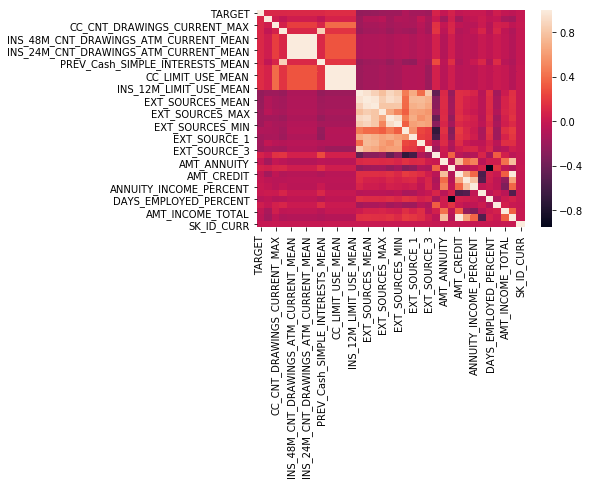

In [32]:
sns.heatmap(dtrain.corr())

In [30]:
dtrain.to_csv("dtrain.csv", index=False)

In [31]:
dtest.to_csv("dtest.csv", index=False)